In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
TD = pd.read_csv('TrainData.csv')
TD = TD[['TIMESTAMP', 'POWER']]


WFI = pd.read_csv('WeatherForecastInput.csv')
SOL = pd.read_csv('Solution.csv')

display(SOL)

# kNN Method

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics, svm
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math

X_train = TD.iloc[:,1].values
X_train = X_train[0:16078]
X_train = X_train.reshape(-1,1)

y_train = TD.iloc[:,1].values
y_train = y_train[1:16079]
y_train = y_train.reshape(-1,1)

#X_test = SOL.iloc[:,1].values
#X_test = X_test[0:718]
#X_test = X_test.reshape(-1,1)
y_test = SOL.iloc[:,1].values
#y_test = y_test[1:719]

x_test1 = y_train[-1]
x_test2 = SOL.iloc[:,1].values
x_test2 = x_test2[0:-1]
X_test = np.append(x_test1,x_test2)
X_test = X_test.reshape(-1,1)
print(len(X_test))

In [ ]:
# LR Method
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#mse = mean_squared_error(X_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
#print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error LR:", rmse)

# KNN Method
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#mse = mean_squared_error(X_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
#print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error kNN:", rmse)


# SVR Method
svr = svm.SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

#mse = mean_squared_error(X_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
#print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error SVR:", rmse)


# ANN MEthod
mlp = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp.fit(X_train, y_train)
y_pred_ann = mlp.predict(X_test)

#mse = mean_squared_error(X_test, y_pred_ann)
mse = mean_squared_error(y_test, y_pred_ann)
#print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error ANN:", rmse)

# RNN method

In [ ]:
# Reshape into correct shape for model input
X_train_correctshape = X_train
X_test_correctshape = X_test

X_train_correctshape = np.reshape(X_train_correctshape, (X_train_correctshape.shape[0], 1, X_train_correctshape.shape[1]))
X_test_correctshape = np.reshape(X_test_correctshape, (X_test_correctshape.shape[0], 1, X_test_correctshape.shape[1]))

# Build model and train it with training data
rnn_model = Sequential()
rnn_model.add(LSTM(20, input_shape=(X_train_correctshape.shape[1:])))
rnn_model.add(Dense(1))
rnn_model.compile(loss='mean_squared_error', optimizer='adam')
rnn_model.fit(X_train_correctshape, y_train, epochs=5, batch_size=1, verbose=1)

# Predict power generation from test data
y_pred_rnn = rnn_model.predict(X_test_correctshape)

In [ ]:
rmse_rnn = np.sqrt(0.0118)
print("Root Mean Squared Error RNN:", rmse_rnn)

# PLOTTING

In [ ]:
SOL['Index'] = SOL.index
x = SOL['Index']
y = SOL['POWER']

## LR plot

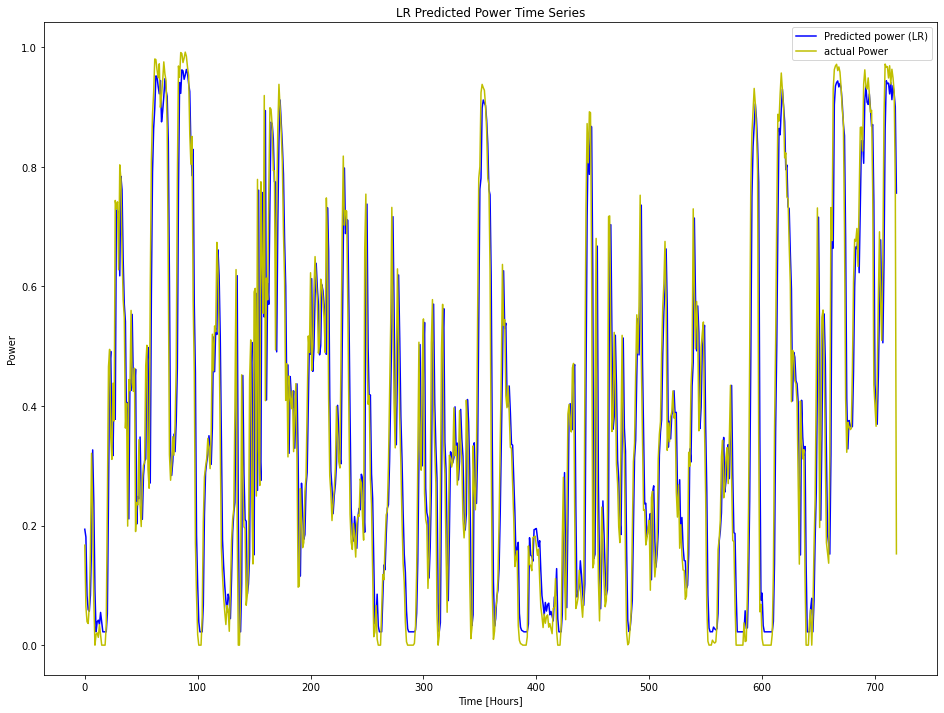

In [147]:
plt.plot(x,y_pred_lr, label = 'Predicted power (LR)', color = 'b')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('LR Predicted Power Time Series')
plt.legend()
plt.savefig('timeseries_LR')
plt.show()

## RNN plot

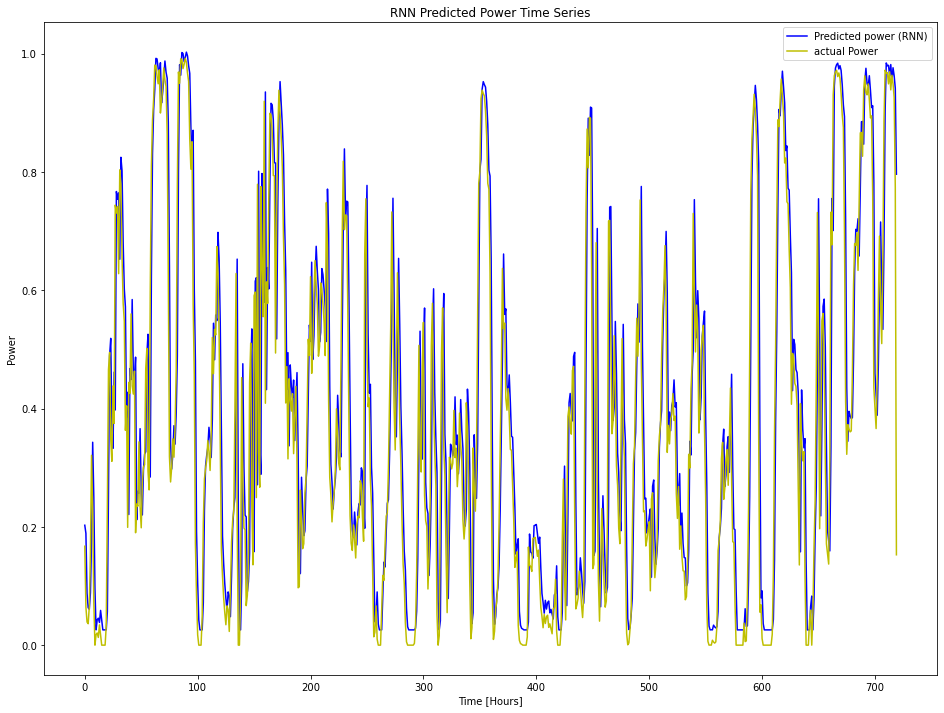

In [148]:
plt.plot(x,y_pred_rnn, label = 'Predicted power (RNN)', color = 'b')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('RNN Predicted Power Time Series')
plt.legend()
plt.savefig('timeseries_RNN')
plt.show()

# SVR plot

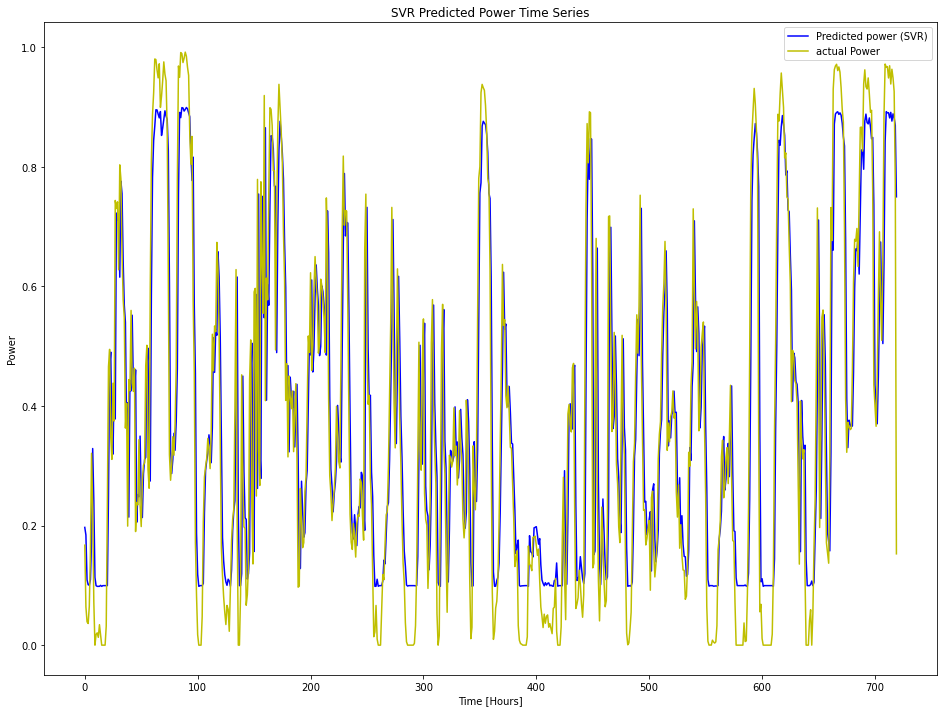

In [149]:
plt.plot(x,y_pred_svr, label = 'Predicted power (SVR)', color = 'b')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('SVR Predicted Power Time Series')
plt.legend()
plt.savefig('timeseries_SVR')
plt.show()

## ANN plot

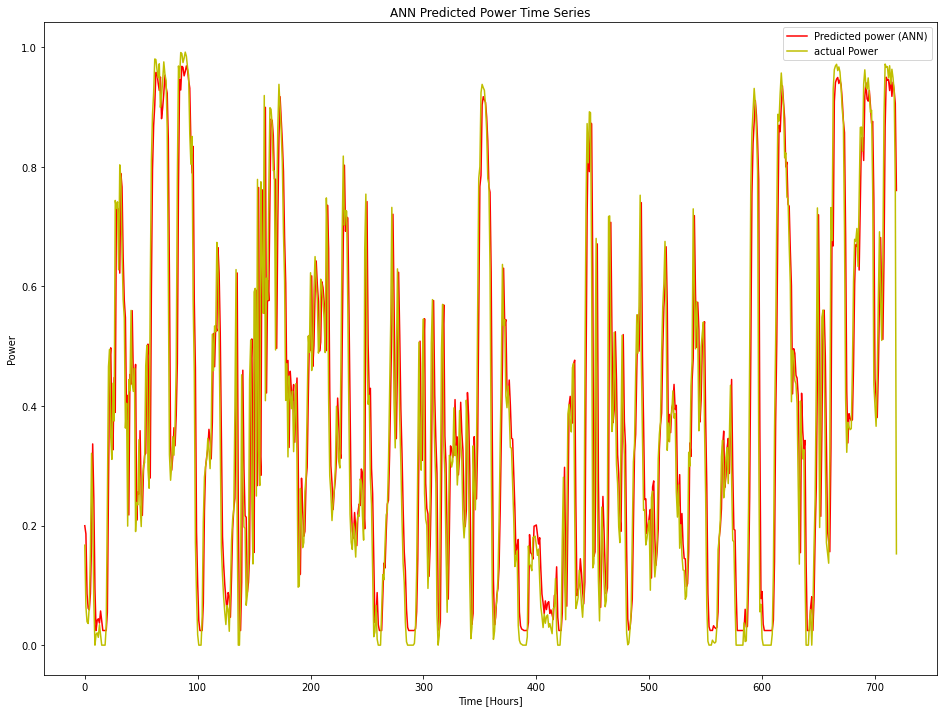

In [150]:
plt.plot(x,y_pred_ann, label = 'Predicted power (ANN)', color = 'r')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('ANN Predicted Power Time Series')
plt.legend()
plt.savefig('timeseries_ANN')
plt.show()

# SVR vs LR plots

In [ ]:
plt.plot(x,y_pred_svr, label = 'Predicted power (SVR)', color = 'b')
plt.plot(x,y_pred_lr, label = 'Predicted power (LR)', color = 'r')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('SVR vs LR Predicted Power Time Series')
plt.legend()
plt.savefig('timeseries_SVR_LR')
plt.show()

# RNN vs ANN plot

In [ ]:
plt.plot(x,y_pred_rnn, label = 'Predicted power (RNN)', color = 'b')
plt.plot(x,y_pred_ann, label = 'Predicted power (ANN)', color = 'r')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('RNN vs ANN Predicted Power Time Series')
plt.legend()
plt.savefig('timeseries_RNN_ANN')
plt.show()

In [ ]:
template = pd.read_csv('ForecastTemplate.csv')

tempLR = template
tempLR['FORECAST'] = y_pred_lr

tempSVR = template
tempSVR['FORECAST'] = y_pred_svr

tempANN = template
tempANN['FORECAST'] = y_pred_ann

tempRNN = template
tempRNN['FORECAST'] = y_pred_rnn

tempLR.to_csv('ForecastTemplate3-LR.csv')
tempSVR.to_csv('ForecastTemplate3-SVR.csv')
tempANN.to_csv('ForecastTemplate3-ANN.csv')
tempRNN.to_csv('ForecastTemplate3-RNN.csv')